**Problem Statement: Frame Extraction and Display**

Deliverables :

*   Users should be able to upload one or more video files.

*   The videos can be in any common format such as MP4, AVI, MOV, MKV, or FLV.

*   The code extracts frames from uploaded input.

*   Extracted frames should be displayed in a grid layout.

*   The layout should have a maximum of 6 frames per row.
If there are more than 6 frames, additional frames should continue in subsequent rows.



In [ ]:
#Import the neccesary libraries
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import math

In [ ]:
#Specify the input and output directories
input_video_dir = 'input_videos'
output_frames_dir = 'extracted_frames'

#Create the directories if they don't exist
os.makedirs(input_video_dir, exist_ok=True)
os.makedirs(output_frames_dir, exist_ok=True)

In [ ]:
#Upload video to the input directory
uploaded = files.upload()

#Save uploaded video to the input directory
for filename in uploaded.keys():
    with open(os.path.join(input_video_dir, filename), 'wb') as f:
        f.write(uploaded[filename])

In [ ]:
#Function to extract frames from a video
def extract_frames(video_path, frame_interval=30):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    extracted_frames = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % frame_interval == 0:
            extracted_frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        frame_count += 1

    cap.release()
    print(f'Extracted {len(extracted_frames)} frames from the video.')
    return extracted_frames


Saving 3209828-uhd_3840_2160_25fps.mp4 to 3209828-uhd_3840_2160_25fps (1).mp4
Extracted 12 frames from the video.


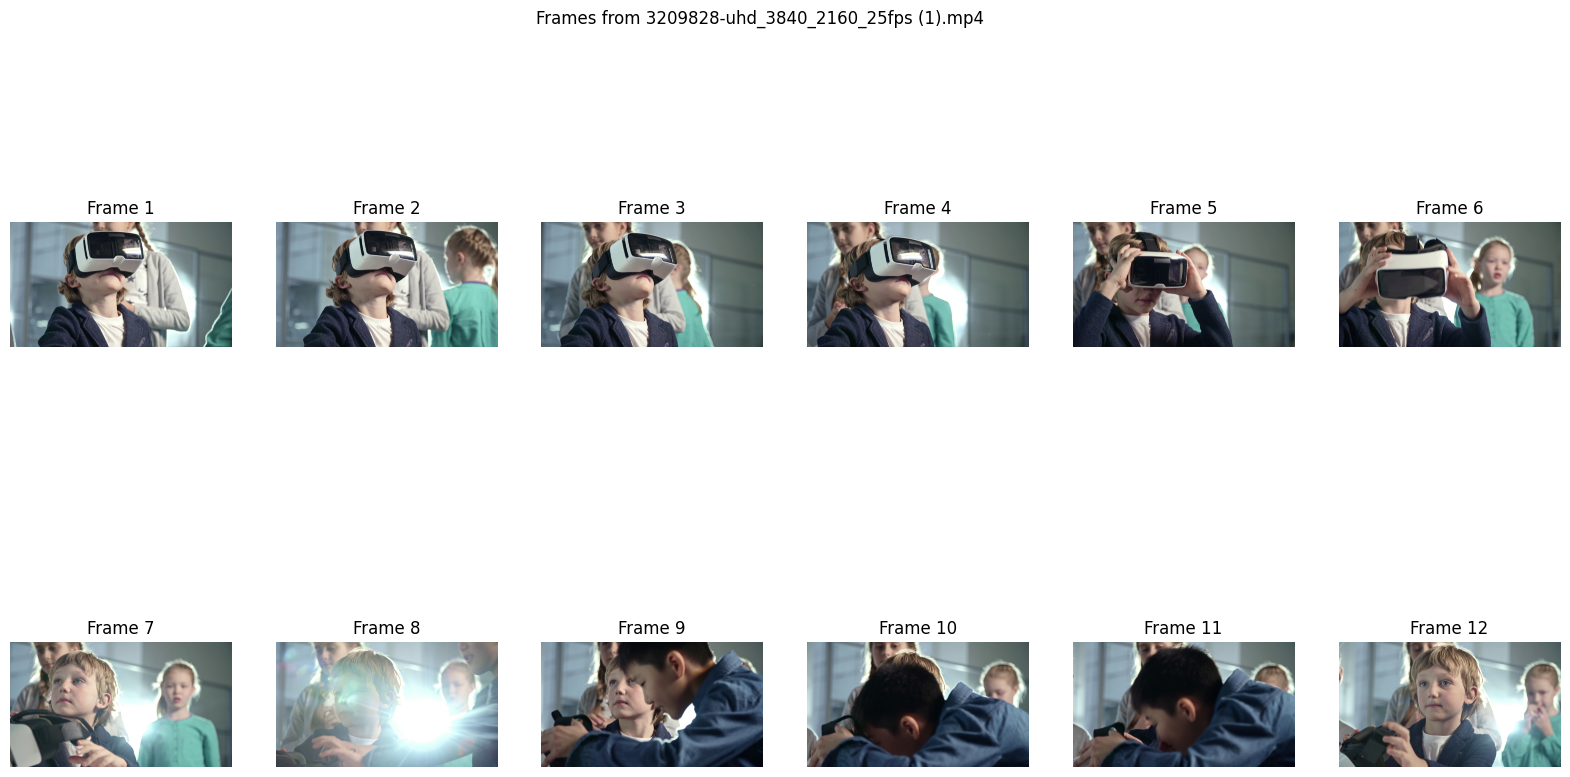

Frame extraction and display complete!


In [12]:
#Process each video in the input directory
for filename in uploaded.keys():
    if filename.lower().endswith(('.mp4', '.avi', '.mov', '.mkv', '.flv')):
        try:
            video_path = os.path.join(input_video_dir, filename)
            extracted_frames = extract_frames(video_path)

            #Determine the number of rows needed based on the number of frames and frames per row
            num_frames = len(extracted_frames)
            frames_per_row = 6
            num_rows = math.ceil(num_frames / frames_per_row)

            #Create the figure with subplots arranged in a grid
            plt.figure(figsize=(20, 5 * num_rows))
            for i, frame in enumerate(extracted_frames, start=1):
                row_index = (i - 1) // frames_per_row
                col_index = (i - 1) % frames_per_row
                plt.subplot(num_rows, frames_per_row, i)
                plt.imshow(frame)
                plt.title(f'Frame {i}')
                plt.axis('off')

            plt.suptitle(f'Frames from {filename}')
            plt.show()

        except Exception as e:
            print(f"Error processing {filename}: {e}")

print('Frame extraction and display complete!')
